In [77]:
# Dependencies
from matplotlib import pyplot as plt
from scipy import stats
import numpy as np
import pandas as pd
from scipy.stats import linregress

In [99]:
# Load crime data set into pandas
crime_data = pd.read_csv("../Resources/crime_data.csv")
crime_data.head(15)

,year,population,violent crime,violent crime rate,murder and non-negligent manslaughter,murder and non-negligent manslaughter rate,rape,rape rate,robbery,robbery rate,aggravated assault,aggravated assault rate,property crime,property crime rate,burglary,burglary rate,larceny-theft,larceny-theft rate,motor vehicle theft,motor vehicle theft rate
0,1994.0,260327021.0,1857670.0,713.6,23326.0,9.0,102216.0,39.3,618949.0,237.8,1113179.0,427.6,12131873.0,4660.2,2712774.0,1042.1,7879812.0,3026.9,1539287.0,591.3
1,1995.0,262803276.0,1798792.0,684.5,21606.0,8.2,97470.0,37.1,580509.0,220.9,1099207.0,418.3,12063935.0,4590.5,2593784.0,987.0,7997710.0,3043.2,1472441.0,560.3
2,1996.0,265228572.0,1688540.0,636.6,19645.0,7.4,96252.0,36.3,535594.0,201.9,1037049.0,391.0,11805323.0,4451.0,2506400.0,945.0,7904685.0,2980.3,1394238.0,525.7
3,1997.0,267783607.0,1636096.0,611.0,18208.0,6.8,96153.0,35.9,498534.0,186.2,1023201.0,382.1,11558475.0,4316.3,2460526.0,918.8,7743760.0,2891.8,1354189.0,505.7
4,1998.0,270248003.0,1533887.0,567.6,16974.0,6.3,93144.0,34.5,447186.0,165.5,976583.0,361.4,10951827.0,4052.5,2332735.0,863.2,7376311.0,2729.5,1242781.0,459.9
5,1999.0,272690813.0,1426044.0,523.0,15522.0,5.7,89411.0,32.8,409371.0,150.1,911740.0,334.3,10208334.0,3743.6,2100739.0,770.4,6955520.0,2550.7,1152075.0,422.5
6,2000.0,281421906.0,1425486.0,506.5,15586.0,5.5,90178.0,32.0,408016.0,145.0,911706.0,324.0,10182584.0,3618.3,2050992.0,728.8,6971590.0,2477.3,1160002.0,412.2
7,2001.0,285317559.0,1439480.0,504.5,16037.0,5.6,90863.0,31.8,423557.0,148.5,909023.0,318.6,10437189.0,3658.1,2116531.0,741.8,7092267.0,2485.7,1228391.0,430.5
8,2002.0,287973924.0,1423677.0,494.4,16229.0,5.6,95235.0,33.1,420806.0,146.1,891407.0,309.5,10455277.0,3630.6,2151252.0,747.0,7057379.0,2450.7,1246646.0,432.9
9,2003.0,290788976.0,1383676.0,475.8,16528.0,5.7,93883.0,32.3,414235.0,142.5,859030.0,295.4,10442862.0,3591.2,2154834.0,741.0,7026802.0,2416.5,1261226.0,433.7


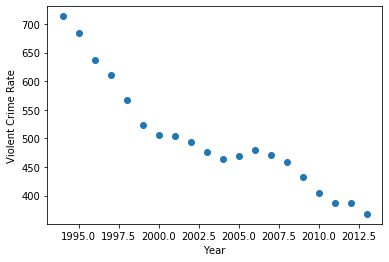

In [88]:
# Generate a scatter plot of violent crime rate versus year
year = crime_data['year']
violent_crime_rate = crime_data['violent crime rate']
plt.scatter(year,violent_crime_rate)
plt.xlabel('Year')
plt.ylabel('Violent Crime Rate')
plt.show()


In [89]:
# Perform a linear regression on violent crime rate versus year
(slope, intercept, rvalue, pvalue, stderr) = linregress(year, violent_crime_rate)
regress_values = year * slope + intercept


In [90]:
# Create equation of line to calculate predicted violent crime rate
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
line_eq

'y = -15.47x + 31487.19'

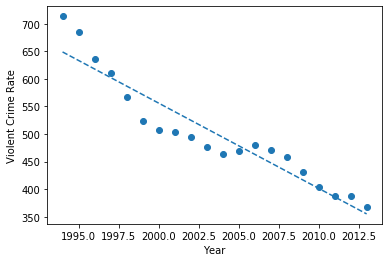

In [91]:
# Plot the linear model on top of scatter plot 
year = crime_data['year']
violent_crime_rate = crime_data['violent crime rate']
plt.scatter(year,violent_crime_rate)
plt.xlabel('Year')
plt.ylabel('Violent Crime Rate')
vc_regress_values=slope*year+intercept
plt.plot(x_values,vc_regress_values,"--")
plt.show()


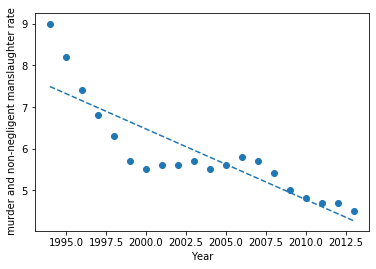

In [92]:
# Repeat plotting scatter and linear model for murder rate versus year
year = crime_data['year']
murder_rate = crime_data[' murder and non-negligent manslaughter rate']
(slope, intercept, rvalue, pvalue, stderr) = linregress(year, murder_rate)
mr_regress_values = year * slope + intercept
plt.scatter(year,murder_rate)
plt.xlabel('Year')
plt.ylabel(' murder and non-negligent manslaughter rate')
plt.plot(year,mr_regress_values,"--")
plt.show()

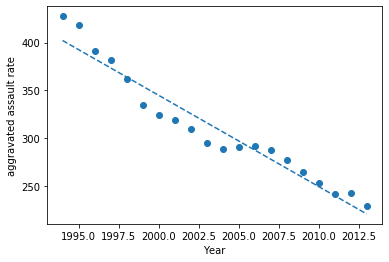

In [93]:
# Repeat plotting scatter and linear model for aggravated assault versus year
year = crime_data['year']
aggravated_assault = crime_data['aggravated assault rate']
(slope, intercept, rvalue, pvalue, stderr) = linregress(year, aggravated_assault)
as_regress_values = year * slope + intercept
plt.scatter(year,aggravated_assault)
plt.xlabel('Year')
plt.ylabel('aggravated assault rate')
plt.plot(x_values,as_regress_values,"--")
plt.show()

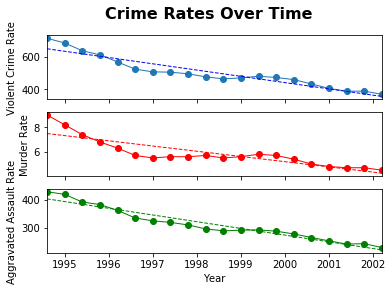

In [95]:
# Generate a facet plot of all 3 figures
year_label = [str(int(y)) for y in year]
# Generate a facet plot of all 3 figures
fig, (ax1, ax2, ax3) = plt.subplots(3, sharex=True)
fig.suptitle("Crime Rates Over Time", fontsize=16, fontweight="bold")
ax1.set_xlim(min(year), max(year))
ax1.plot(year, violent_crime_rate, linewidth=1, marker="o")
ax1.plot(year, vc_regress_values, "b--", linewidth=1)
ax1.set_ylabel("Violent Crime Rate")
ax2.plot(year, murder_rate, linewidth=1, marker="o", color="r")
ax2.plot(year, mr_regress_values, "r--", linewidth=1)
ax2.set_ylabel("Murder Rate")
ax3.plot(year, aggravated_assault, linewidth=1, marker="o", color="g")
ax3.plot(year, as_regress_values, "g--", linewidth=1)
ax3.set_ylabel("Aggravated Assault Rate")
ax3.set_xlabel("Year")
ax3.set_xticklabels(year_label)
plt.show()

In [98]:
# Calculate the crime rates for 2019
(slope, intercept, rvalue, pvalue, stderr) = linregress(year, violent_crime_rate)
_2019_crime_rates = 2019 * slope + intercept
_2019_crime_rates

262.2137593984953